In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import cPickle as pickle

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)

####Clean_before_model

In [4]:
df = pd.read_pickle('df_1to7499_features.pkl')

In [5]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id,GEO.display-label,Median_Value,Margin_of_Error,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA",5.338641,6.158729,5.467939,5.688451,9.453253,7.300465,1,3,3,93,530330114011,1500000US530330114011,"Block Group 1, Census Tract 114.01, King Count...",307500,53269,1,0,1,1,1
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3,3,42,530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,5,0,1,1,1


In [6]:
df.tail(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id,GEO.display-label,Median_Value,Margin_of_Error,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US
4755,7499,225583,NE 130TH ST BETWEEN LAKE CITY WAY NE AND 33RD ...,NE 130TH ST BETWEEN LAKE CITY WAY NE AND 33RD ...,2013-10-01 07:00:00,2013-10-01 07:00:00,2013-10-02 07:00:00,1 days,1,47.744614,-122.294066,"33rd Ave NE, Seattle, WA, USA",9.724967,8.952767,9.586114,9.369915,5.944939,7.978499,4,-4,10,,530330214002,1500000US530330214002,"Block Group 2, Census Tract 214, King County, ...",428400,54553,1,0,1,1,1
4756,7500,210335,EB bike lane between 14th and 16th Ave ...,E UNION ST BETWEEN 15TH AVE AND 16TH AVE ...,2013-07-10 07:00:00,2013-07-12 07:00:00,2013-07-12 07:00:00,2 days,2,47.610378,-122.311513,"16th Ave, Seattle, WA 98122, USA",1.002700,1.897800,1.434032,0.944730,4.473846,2.862636,3,-1,7,55,530330079003,1500000US530330079003,"Block Group 3, Census Tract 79, King County, W...",245000,35437,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4757 entries, 0 to 4756
Data columns (total 32 columns):
OBJECTID                  4757 non-null int64
WOKEY                     4757 non-null int64
LOCATION                  4757 non-null object
ADDRDESC                  4757 non-null object
INITDT_dt                 4757 non-null datetime64[ns]
FLDSTARTDT_dt             4757 non-null datetime64[ns]
FLDENDDT_dt               4757 non-null datetime64[ns]
DURATION                  4757 non-null timedelta64[ns]
DURATION_td               4757 non-null float64
latitude                  4757 non-null float64
longitude                 4757 non-null float64
address                   4757 non-null object
Seattle_dist              4757 non-null float64
Space_Needle_dist         4757 non-null float64
Pike_Place_dist           4757 non-null float64
Convention_Center_dist    4757 non-null float64
Woodland_Park_dist        4757 non-null float64
Queene_Anne_dist          4757 non-null float64
INIT_Qu

1. Strip time of day from datetime.
2. Remove NaNs.
3. Drop OBJECTID, WOKEY, GEO.id, location, address, ADDRDESC, GEOID, GEO.display-label

In [8]:
df.ix[0,'INITDT_dt']

Timestamp('2010-03-29 07:00:00')

In [9]:
df.ix[0,'INITDT_dt'].strftime('%Y-%m-%d')

'2010-03-29'

In [10]:
df.ix[0,'INITDT_dt'].to_datetime()

datetime.datetime(2010, 3, 29, 7, 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4757 entries, 0 to 4756
Data columns (total 32 columns):
OBJECTID                  4757 non-null int64
WOKEY                     4757 non-null int64
LOCATION                  4757 non-null object
ADDRDESC                  4757 non-null object
INITDT_dt                 4757 non-null datetime64[ns]
FLDSTARTDT_dt             4757 non-null datetime64[ns]
FLDENDDT_dt               4757 non-null datetime64[ns]
DURATION                  4757 non-null timedelta64[ns]
DURATION_td               4757 non-null float64
latitude                  4757 non-null float64
longitude                 4757 non-null float64
address                   4757 non-null object
Seattle_dist              4757 non-null float64
Space_Needle_dist         4757 non-null float64
Pike_Place_dist           4757 non-null float64
Convention_Center_dist    4757 non-null float64
Woodland_Park_dist        4757 non-null float64
Queene_Anne_dist          4757 non-null float64
INIT_Qu

In [12]:
df[pd.isnull(df.neighborhood_label)].shape

(0, 32)

In [13]:
df[df.neighborhood_label == ''].shape

(172, 32)

In [14]:
np.any(df.neighborhood_label != '')

True

In [15]:
df = df[df['neighborhood_label'] != '']

In [16]:
np.any(df.neighborhood_label == '')

False

####Don't forget to remove the DURATION_td that rounded to zeros.

In [17]:
df[pd.isnull(df.Median_Value)]

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address,Seattle_dist,Space_Needle_dist,Pike_Place_dist,Convention_Center_dist,Woodland_Park_dist,Queene_Anne_dist,INIT_Quarter,days_end_FY,INIT_month,neighborhood_label,GEOID,GEO.id,GEO.display-label,Median_Value,Margin_of_Error,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days 00:00:00,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ...",3.222458,2.867154,3.231487,2.889531,2.654837,2.610214,1,3,3,42,530330053022,1500000US530330053022,"Block Group 2, Census Tract 53.02, King County...",NaN,NaN,5,0,1,1,1
6,10,7211,Republican and Minor Ave N ...,MINOR AVE N AND REPUBLICAN ST ...,2010-04-29 07:00:00,2010-05-03 07:00:00,2010-05-03 07:00:00,4 days 00:00:00,4,47.623131,-122.333003,"Republican St & Minor Ave N, Seattle, WA 98109...",1.169861,0.781462,1.021139,0.813571,3.281758,1.527051,2,2,4,49,530330073001,1500000US530330073001,"Block Group 1, Census Tract 73, King County, W...",NaN,NaN,1,0,1,1,1
10,15,6242,51ST S & S Ryan ...,HILLSIDE DR E AND LAKE WASHINGTON BLVD E ...,2010-04-22 07:00:00,2010-04-22 07:00:00,2010-04-26 07:00:00,4 days 00:00:00,4,47.622480,-122.284664,"Lake Washington Blvd E & Hillside Dr E, Seattl...",2.483533,3.021072,2.828254,2.326059,4.527405,3.573024,2,2,4,54,530330078001,1500000US530330078001,"Block Group 1, Census Tract 78, King County, W...",NaN,NaN,1,0,1,1,1
23,38,342639,"2102 22ND AVE S, SEATTLE, WA 98144 ...",22ND AVE S BETWEEN S HILL ST AND S WALKER ST ...,2015-04-01 07:00:00,2015-04-06 07:00:00,2015-04-06 07:00:00,5 days 00:00:00,5,47.583702,-122.314112,"S Walker St, Seattle, WA, USA",1.766965,3.027356,2.225497,2.081495,6.144999,4.240382,2,2,4,79,530330094004,1500000US530330094004,"Block Group 4, Census Tract 94, King County, W...",NaN,NaN,1,0,1,1,1
67,111,343927,Stewart and Boren ...,STEWART ST BETWEEN BOREN AVE AND MINOR AVE ...,2015-04-09 07:00:00,2015-04-13 07:00:00,2015-04-13 07:00:00,4 days 00:00:00,4,47.612826,-122.326770,"Minor Ave, Seattle, WA, USA",0.519894,1.177662,0.751792,0.249940,4.048375,2.238507,2,2,4,63,530330084002,1500000US530330084002,"Block Group 2, Census Tract 84, King County, W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,119,332537,6TH AVE BETWEEN PIKE ST AND PINE ST ...,6TH AVE BETWEEN PIKE ST AND PINE ST ...,2015-02-17 08:00:00,2015-02-20 08:00:00,2015-02-20 08:00:00,3 days 00:00:00,3,47.612370,-122.334827,"Pine St, Seattle, WA, USA",0.444644,0.878418,0.389780,0.161885,3.978763,2.041349,1,4,2,62,530330082001,1500000US530330082001,"Block Group 1, Census Tract 82, King County, W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,171,319529,"1116 OLIVE WAY, SEATTLE, WA 98101 ...",OLIVE WAY BETWEEN BOREN AVE AND MINOR AVE ...,2014-12-15 08:00:00,2014-12-17 08:00:00,2014-12-17 08:00:00,2 days 00:00:00,2,47.612826,-122.326770,"Minor Ave, Seattle, WA, USA",0.519894,1.177662,0.751792,0.249940,4.048375,2.238507,4,-6,12,63,530330084002,1500000US530330084002,"Block Group 2, Census Tract 84, King County, W...",NaN,NaN,1,0,1,1,1
123,180,320411,DENNY WAY BETWEEN AURORA NB AVE N AND DEXTER A...,DENNY WAY BETWEEN AURORA NB AVE N AND DEXTER A...,2014-12-18 08:00:00,2014-12-22 08:00:00,2014-12-22 08:00:00,4 days 00:00:00,4,47.618190,-122.342398,"Dexter Ave, Seattle, WA 98121, USA",0.958050,0.358961,0.585256,0.686639,3.517834,1.515738,4,-6,12,60,530330072002,1500000US530330072002,"Block Group 2, Census Tract 72, King County, W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,236,317928,Western and 1st B/T Bell and Blanchard ...,1ST AVE BETWEEN BLANCHARD ST AND BELL ST ...,2014-12-11 08:00:00,2014-12-15 08:00:00,2014-12-15 08:00:00,4 days 00:00:00,4,47.615276,-122.344060,"Bell St, Seattle, WA 98121, USA",0.840286,0.435833,0.393635,0.637657,3.706866,1.663748,4,-6,12,60,530330072002,1500000US530330072002,"Block Group 2, Census Tract 72, K

In [18]:
df.apply(lambda x: np.sum(pd.isnull(x)/float(4757)))

OBJECTID                  0.000000
WOKEY                     0.000000
LOCATION                  0.000000
ADDRDESC                  0.000000
INITDT_dt                 0.000000
FLDSTARTDT_dt             0.000000
FLDENDDT_dt               0.000000
DURATION                  0.000000
DURATION_td               0.000000
latitude                  0.000000
longitude                 0.000000
address                   0.000000
Seattle_dist              0.000000
Space_Needle_dist         0.000000
Pike_Place_dist           0.000000
Convention_Center_dist    0.000000
Woodland_Park_dist        0.000000
Queene_Anne_dist          0.000000
INIT_Quarter              0.000000
days_end_FY               0.000000
INIT_month                0.000000
neighborhood_label        0.000000
GEOID                     0.000000
GEO.id                    0.003784
GEO.display-label         0.003784
Median_Value              0.060122
Margin_of_Error           0.060122
SND_FEACOD                0.348539
ST_CODE             

I'm getting a lot of NaNs, unfortunately.  Not much I can do about it.  At least check if there's anything special about those.

In [19]:
df['b_no_Median_Value'] = pd.isnull(df.Median_Value)
df['b_no_street_feature_label'] = pd.isnull(df.SND_FEACOD)

In [20]:
df.groupby('b_no_Median_Value').describe().T

b_no_Median_Value         False                          \
                          count                    mean   
Convention_Center_dist     4299                4.143027   
DIVIDED_CO                 2750                1.027273   
DURATION                   4299  5 days 21:06:30.230286   
DURATION_td                4299                5.864387   
INIT_Quarter               4299                2.105606   
INIT_month                 4299                5.304024   
Margin_of_Error            4299                73515.22   
Median_Value               4299                429781.8   
OBJECTID                   4299                 3735.47   
Pike_Place_dist            4299                4.230646   
Queene_Anne_dist           4299                 4.22295   
SEGMENT_TY                 2750                1.092727   
SND_FEACOD                 2750                3.342909   
ST_CODE                    2750                1.015273   
Seattle_dist               4299                4.238109   
Space_Needle_dist          4299                4.160788   
VEHICLE_US                 2750                1.013818   
WOKEY                      4299                180732.1   
Woodland_Park_dist         4299                 4.60714   
b_no_street_feature_label  4299               0.3603164   
days_end_FY                4299               0.6959758   
latitude                   4299                47.63072   
longitude                  4299                -122.333   

b_no_Median_Value                                                    \
                                               std              min   
Convention_Center_dist                    2.260651       0.05907421   
DIVIDED_CO                               0.3151068                1   
DURATION                   10 days 00:50:29.305781  0 days 23:00:00   
DURATION_td                               10.02145                0   
INIT_Quarter                              1.150804                1   
INIT_month                                3.675711                1   
Margin_of_Error                           71166.17             7920   
Median_Value                              152861.9           162800   
OBJECTID                                  2192.294                1   
Pike_Place_dist                           2.209101       0.08113593   
Queene_Anne_dist                          2.055429        0.1769855   
SEGMENT_TY                               0.7641843                1   
SND_FEACOD                                8.556355                0   
ST_CODE                                   5.774512                0   
Seattle_dist                              2.322908        0.1331334   
Space_Needle_dist                         2.062342       0.07832898   
VEHICLE_US                               0.1368392                1   
WOKEY                                     113447.4             1591   
Woodland_Park_dist                        2.649208        0.1887608   
b_no_street_feature_label                 0.480148            False   
days_end_FY                               3.675711               -6   
latitude                                0.06128288         47.49927   
longitude                               0.03429511        -122.4181   

b_no_Median_Value                                                             \
                                       25%              50%              75%   
Convention_Center_dist            2.034251          4.22134         6.015359   
DIVIDED_CO                               1                1                1   
DURATION                   1 days 00:00:00  3 days 00:00:00  6 days 00:00:00   
DURATION_td                              1                3                6   
INIT_Quarter                             1                2                3   
INIT_month                               2                4                8   
Margin_of_Error                      34842            52281            82817   
Median_Value                

In [21]:
df.groupby('b_no_street_feature_label').describe().T

b_no_street_feature_label False                          \
                          count                    mean   
Convention_Center_dist     2927                4.051036   
DIVIDED_CO                 2927                1.029382   
DURATION                   2927  5 days 22:19:51.800478   
DURATION_td                2927                5.912538   
INIT_Quarter               2927                2.113085   
INIT_month                 2927                5.337547   
Margin_of_Error            2750                 73942.3   
Median_Value               2750                427964.7   
OBJECTID                   2927                 3695.54   
Pike_Place_dist            2927                 4.14536   
Queene_Anne_dist           2927                4.134611   
SEGMENT_TY                 2927                1.092928   
SND_FEACOD                 2927                3.343355   
ST_CODE                    2927                1.057055   
Seattle_dist               2927                4.155118   
Space_Needle_dist          2927                4.069432   
VEHICLE_US                 2927                1.014349   
WOKEY                      2927                178580.9   
Woodland_Park_dist         2927                4.538331   
b_no_Median_Value          2927              0.06047147   
days_end_FY                2927                0.662453   
latitude                   2927                 47.6313   
longitude                  2927               -122.3328   

b_no_street_feature_label                                            \
                                               std              min   
Convention_Center_dist                    2.297814       0.05907421   
DIVIDED_CO                               0.3324926                1   
DURATION                   10 days 14:38:08.467339  0 days 23:00:00   
DURATION_td                               10.59207                0   
INIT_Quarter                              1.161228                1   
INIT_month                                3.704595                1   
Margin_of_Error                           72680.24             7920   
Median_Value                              152255.4           162800   
OBJECTID                                  2218.901                1   
Pike_Place_dist                           2.242012        0.1178035   
Queene_Anne_dist                          2.061768        0.1769855   
SEGMENT_TY                               0.7560925                1   
SND_FEACOD                                8.534677                0   
ST_CODE                                   5.896217                0   
Seattle_dist                              2.353148        0.1102589   
Space_Needle_dist                         2.093279       0.07832898   
VEHICLE_US                               0.1424775                1   
WOKEY                                     113303.5             1591   
Woodland_Park_dist                        2.599839         0.339532   
b_no_Median_Value                         0.238399            False   
days_end_FY                               3.704595               -6   
latitude                                0.06017832         47.49965   
longitude                               0.03395017        -122.4171   

b_no_street_feature_label                                                     \
                                       25%              50%              75%   
Convention_Center_dist            1.934475          4.05372         6.000285   
DIVIDED_CO                               1                1                1   
DURATION                   1 days 00:00:00  3 days 00:00:00  6 days 00:00:00   
DURATION_td                              1                3                6   
INIT_Quarter                             1                2                3   
INIT_month                               2                4                8   
Margin_of_Error                      34830            52281            82817   
Median_Value                

In [22]:
from scipy import stats
def ttest_by(vals, by):
    '''Compute a t-test on a column based on an indicator for which sample the values are in.'''
    vals1 = vals[by]
    vals2 = vals[-by]
    
    return stats.ttest_ind(vals1, vals2, equal_var='False')

In [23]:
ttest_by(df.DURATION_td, pd.isnull(df.SND_FEACOD))

(-0.7632873964662602, 0.44533130498494589)

In [24]:
ttest_by(df.DURATION_td, pd.isnull(df.Median_Value))

(-0.94338394577983009, 0.34553427928399361)

At least there doesn't seem to be a significant difference between NaNs and non-NaNs.

In [25]:
df[df.b_no_Median_Value != True].shape

(4299, 34)

In [26]:
df_clean = df[df.b_no_Median_Value != True]

Interesting that Median Value = NaN is a superset of neighborhood_label = NaN.

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4299 entries, 0 to 4756
Data columns (total 34 columns):
OBJECTID                     4299 non-null int64
WOKEY                        4299 non-null int64
LOCATION                     4299 non-null object
ADDRDESC                     4299 non-null object
INITDT_dt                    4299 non-null datetime64[ns]
FLDSTARTDT_dt                4299 non-null datetime64[ns]
FLDENDDT_dt                  4299 non-null datetime64[ns]
DURATION                     4299 non-null timedelta64[ns]
DURATION_td                  4299 non-null float64
latitude                     4299 non-null float64
longitude                    4299 non-null float64
address                      4299 non-null object
Seattle_dist                 4299 non-null float64
Space_Needle_dist            4299 non-null float64
Pike_Place_dist              4299 non-null float64
Convention_Center_dist       4299 non-null float64
Woodland_Park_dist           4299 non-null float64
Quee

In [28]:
df[np.isfinite(df['Median_Value'])].shape

(4299, 34)

In [29]:
np.any(pd.isnull(df.Median_Value))

True

In [30]:
df.isnull().values.any()

True

In [31]:
df_clean.isnull().values.any()

True

In [32]:
df_clean[np.isfinite(df['SND_FEACOD'])].shape

C:\Users\andersrmr\Anaconda\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


(2750, 34)

In [33]:
df_cleaner = df_clean[np.isfinite(df['SND_FEACOD'])]

In [34]:
df_cleaner.isnull().values.any()

False

In [35]:
df_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 4754
Data columns (total 34 columns):
OBJECTID                     2750 non-null int64
WOKEY                        2750 non-null int64
LOCATION                     2750 non-null object
ADDRDESC                     2750 non-null object
INITDT_dt                    2750 non-null datetime64[ns]
FLDSTARTDT_dt                2750 non-null datetime64[ns]
FLDENDDT_dt                  2750 non-null datetime64[ns]
DURATION                     2750 non-null timedelta64[ns]
DURATION_td                  2750 non-null float64
latitude                     2750 non-null float64
longitude                    2750 non-null float64
address                      2750 non-null object
Seattle_dist                 2750 non-null float64
Space_Needle_dist            2750 non-null float64
Pike_Place_dist              2750 non-null float64
Convention_Center_dist       2750 non-null float64
Woodland_Park_dist           2750 non-null float64
Quee

In [36]:
df_all = df_cleaner.ix[:, ['neighborhood_label','INIT_Quarter','INIT_month','days_end_FY',
        'Median_Value','Queene_Anne_dist','Woodland_Park_dist','Space_Needle_dist',
        'Seattle_dist','latitude','longitude','INITDT_dt','FLDENDDT_dt','DURATION',
        'DURATION_td','Margin_of_Error','Convention_Center_dist','Pike_Place_dist',
        'SND_FEACOD','ST_CODE','SEGMENT_TY','DIVIDED_CO','VEHICLE_US']]

In [37]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 4754
Data columns (total 23 columns):
neighborhood_label        2750 non-null object
INIT_Quarter              2750 non-null int64
INIT_month                2750 non-null int64
days_end_FY               2750 non-null int64
Median_Value              2750 non-null float64
Queene_Anne_dist          2750 non-null float64
Woodland_Park_dist        2750 non-null float64
Space_Needle_dist         2750 non-null float64
Seattle_dist              2750 non-null float64
latitude                  2750 non-null float64
longitude                 2750 non-null float64
INITDT_dt                 2750 non-null datetime64[ns]
FLDENDDT_dt               2750 non-null datetime64[ns]
DURATION                  2750 non-null timedelta64[ns]
DURATION_td               2750 non-null float64
Margin_of_Error           2750 non-null float64
Convention_Center_dist    2750 non-null float64
Pike_Place_dist           2750 non-null float64
SND_FEACOD    

In [38]:
df_data = pd.concat([df_all.ix[:, ['Queene_Anne_dist','Woodland_Park_dist','DURATION_td',
        'Space_Needle_dist','Convention_Center_dist','Pike_Place_dist',
        'Seattle_dist','latitude','longitude','Median_Value','Margin_of_Error']],
        df_all.neighborhood_label.astype('category'),df_all.SND_FEACOD.astype('category'),
        df_all.INIT_Quarter.astype('category'),df_all.ST_CODE.astype('category'),
        df_all.SEGMENT_TY.astype('category'),df_all.DIVIDED_CO.astype('category'),
        df_all.INIT_month.astype('int')], axis=1)

####Some more EDA

DURATION_td appears to be very skewed.  take a closer look.

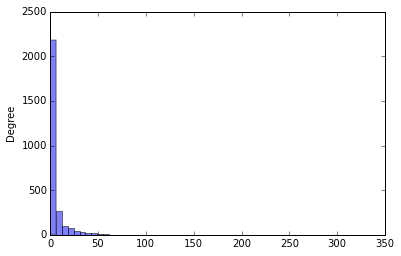

In [87]:
df_all.DURATION_td.plot(kind='hist', alpha=0.5, bins=50)

In [88]:
df_all.DURATION_td.describe()

count    2750.000000
mean        5.922182
std        10.767109
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       307.000000
Name: DURATION_td, dtype: float64

In [93]:
df_all.DURATION.value_counts()

1 days 00:00:00      880
2 days 00:00:00      379
3 days 00:00:00      312
4 days 00:00:00      207
5 days 00:00:00      201
6 days 00:00:00      168
7 days 00:00:00       81
8 days 00:00:00       61
9 days 00:00:00       33
11 days 00:00:00      29
10 days 00:00:00      29
13 days 00:00:00      23
12 days 00:00:00      22
17 days 00:00:00      21
20 days 00:00:00      20
19 days 00:00:00      17
15 days 00:00:00      15
14 days 00:00:00      15
21 days 00:00:00      14
16 days 00:00:00      14
18 days 00:00:00      10
30 days 00:00:00      10
32 days 00:00:00       8
28 days 00:00:00       8
23 days 00:00:00       7
27 days 00:00:00       7
22 days 00:00:00       7
2 days 23:00:00        7
31 days 00:00:00       6
25 days 00:00:00       6
                    ... 
7 days 01:00:00        2
33 days 01:00:00       1
50 days 23:00:00       1
64 days 00:00:00       1
55 days 00:00:00       1
61 days 23:00:00       1
39 days 23:00:00       1
6 days 23:00:00        1
46 days 00:00:00       1


####Ok, there are no zero days.

In [95]:
sum(df_all.DURATION_td == 0.0000)

2

In [96]:
df_all[df_all.DURATION_td == 0.000]

,neighborhood_label,INIT_Quarter,INIT_month,days_end_FY,Median_Value,Queene_Anne_dist,Woodland_Park_dist,Space_Needle_dist,Seattle_dist,latitude,longitude,INITDT_dt,FLDENDDT_dt,DURATION,DURATION_td,Margin_of_Error,Convention_Center_dist,Pike_Place_dist,SND_FEACOD,ST_CODE,SEGMENT_TY,DIVIDED_CO,VEHICLE_US
295,98,1,3,3,721400,2.731130,3.527669,2.458049,2.369669,47.632692,-122.299830,2015-03-08 08:00:00,2015-03-09 07:00:00,23:00:00,0,61113,2.092643,2.536548,1,0,1,1,1
2718,45,1,3,3,367000,0.922038,3.028934,0.901674,2.113811,47.625639,-122.367027,2013-03-10 08:00:00,2013-03-11 07:00:00,23:00:00,0,57656,1.922310,1.598502,1,0,1,1,1


In [97]:
df_all[df_all.DURATION_td == 0.000].shape

(2, 23)

In [98]:
df_all[df_all.DURATION_td != 0.000].shape

(2748, 23)

In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 4754
Data columns (total 18 columns):
Queene_Anne_dist          2750 non-null float64
Woodland_Park_dist        2750 non-null float64
DURATION_td               2750 non-null float64
Space_Needle_dist         2750 non-null float64
Convention_Center_dist    2750 non-null float64
Pike_Place_dist           2750 non-null float64
Seattle_dist              2750 non-null float64
latitude                  2750 non-null float64
longitude                 2750 non-null float64
Median_Value              2750 non-null float64
Margin_of_Error           2750 non-null float64
neighborhood_label        2750 non-null category
SND_FEACOD                2750 non-null category
INIT_Quarter              2750 non-null category
ST_CODE                   2750 non-null category
SEGMENT_TY                2750 non-null category
DIVIDED_CO                2750 non-null category
INIT_month                2750 non-null int32
dtypes: category(6), floa

In [40]:
y = df_data.pop('DURATION_td')
X = df_data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lr_model.score(X_test,y_test)

-0.0078983248300046327

####Try a decision tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
regressor = DecisionTreeRegressor(random_state=0)

In [70]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=0, splitter='best')

In [81]:
regressor.score(X_test,y_test), mean_squared_error(y_test, regressor.predict(X_test)), mean_absolute_error(y_test, regressor.predict(X_test)), median_absolute_error(y_test, regressor.predict(X_test)) 

(-0.73082156450183633, 114.43828282828282, 5.7290909090909095, 2.0)

(array([  2.66100000e+03,   8.10000000e+01,   6.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   0. ,   30.7,   61.4,   92.1,  122.8,  153.5,  184.2,  214.9,
         245.6,  276.3,  307. ]),
 <a list of 10 Patch objects>)

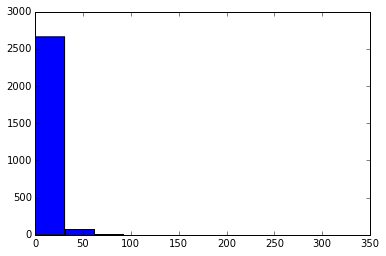

In [83]:
plt.hist(y)

In [67]:
regressor.feature_importances_

array([  5.59708161e-02,   6.39519161e-02,   5.30657363e-02,
         4.88351642e-02,   1.86842162e-02,   3.31449425e-02,
         5.33598954e-02,   4.76439761e-02,   2.74973031e-02,
         3.66142942e-01,   4.38660993e-02,   4.68654966e-02,
         9.97766098e-03,   2.01902377e-02,   1.41810509e-04,
         3.08498869e-03,   1.07576798e-01])

In [89]:
df_data.columns.tolist()

['Queene_Anne_dist',
 'Woodland_Park_dist',
 'Space_Needle_dist',
 'Convention_Center_dist',
 'Pike_Place_dist',
 'Seattle_dist',
 'latitude',
 'longitude',
 'Median_Value',
 'Margin_of_Error',
 'neighborhood_label',
 'SND_FEACOD',
 'INIT_Quarter',
 'ST_CODE',
 'SEGMENT_TY',
 'DIVIDED_CO',
 'INIT_month']

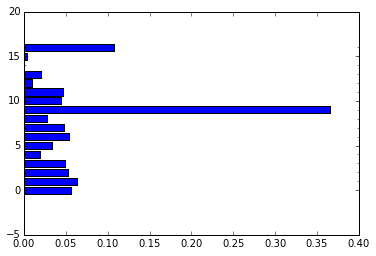

In [90]:
val = regressor.feature_importances_   # the bar lengths
pos = np.arange(len(regressor.feature_importances_))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(pos,val, align='center')
ax.set_yticks(pos, df_data.columns.tolist())

In [69]:
cross_val_score(regressor, X, y, cv=10)

array([-9.82786898, -0.55541643, -3.95135202, -0.21482313, -1.95844351,
       -1.04400958, -0.36224399, -7.32334203, -0.24444975, -1.69262351])

In [72]:
from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

ImportError: cannot import name check_arrays

####Try random forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [49]:
rf.score(X_test, y_test)

-0.48000026132040574

In [50]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [51]:
rf.score(X_test, y_test)

-0.20796715976091695

In [52]:
rf.feature_importances_

array([ 0.07502402,  0.05057805,  0.05848858,  0.05124758,  0.03787241,
        0.04105905,  0.11102432,  0.06634764,  0.09083354,  0.18943913,
        0.05071762,  0.03569461,  0.00921741,  0.01409998,  0.00464722,
        0.00065257,  0.11305626])

In [53]:
df_data.columns.tolist()

['Queene_Anne_dist',
 'Woodland_Park_dist',
 'Space_Needle_dist',
 'Convention_Center_dist',
 'Pike_Place_dist',
 'Seattle_dist',
 'latitude',
 'longitude',
 'Median_Value',
 'Margin_of_Error',
 'neighborhood_label',
 'SND_FEACOD',
 'INIT_Quarter',
 'ST_CODE',
 'SEGMENT_TY',
 'DIVIDED_CO',
 'INIT_month']

####Try gradient boosted regression tree

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [63]:
gbr.score(X_test,y_test)

-0.022264866690316909

####Try AdaBoost Regressor

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [66]:
abr.score(X_test,y_test)

-1.4669111585703041

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

In [75]:
from sklearn.grid_search import GridSearchCV